In [8]:
import jaxopt 
import jax.numpy as jnp
import numpy as np

We optimize $ f(x; a) = (x - \sin(a))^2 $ for $x$.
it should be $x_\ast=\sin(a) \equiv g(a)$

In [66]:
def f(x,a):
    return (x-jnp.sin(a))**2

In [67]:
gd = jaxopt.GradientDescent(fun=f, maxiter=500)

In [68]:
def g(a):
    res = gd.run(init_params=np.random.normal(0.0,1.0), a=a)
    params, state = res
    return params


In [69]:
g(0.1),np.sin(0.1)

(DeviceArray(0.09983341, dtype=float32), 0.09983341664682815)

In [55]:
from jax import grad

We compute $\frac{\partial}{\partial a} x_\mathrm{min} = \frac{\partial}{\partial a} g(a)$, should be $dg(a) = \cos(a)$.

In [70]:
dg=grad(g)

In [72]:

dg(-0.2),np.cos(-0.2)

(DeviceArray(0.9800666, dtype=float32), 0.9800665778412416)

In [73]:
dx=[]
x=[]
alist=np.linspace(-0.2,0.2,21)
for ain in alist:
    x.append(g(ain))
    dx.append(dg(ain))

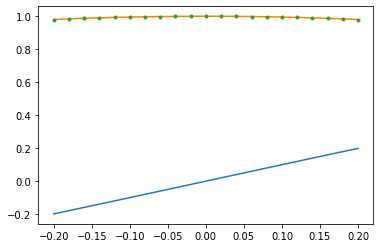

In [74]:
import matplotlib.pyplot as plt
plt.plot(alist,x)
plt.plot(alist,dx)
plt.plot(alist,np.cos(alist),".")